In [5]:
#Importing All the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

# Suppressing warnings to keep the output clean
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset from a CSV file
data =pd.read_csv('Mall_Customers.csv')

# Displaying the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
# Displaying summary information about the dataset
print("\nInfo of the dataset:")
print('******************************************')
print(data.info())


Info of the dataset:
******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
# Displaying basic statistics of the dataset to get a sense of the data distribution
print("\nBasic statistics of the Dataset:")
print('******************************************************')
print(data.describe())


Basic statistics of the Dataset:
******************************************************
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [14]:
# Check for missing values and handling them if any are found
if data.isnull().sum().sum() > 0:
    print("Warning: NaN values found in the dataset. Handling them by forward fill.")
    data.fillna(method='ffill', inplace=True)
    

In [16]:

# Selecting relevant features for clustering (Annual Income and Spending Score)
features = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
# Check for infinite values in the features and handling them if any are found

if not np.isfinite(features).all():
    print("Warning: Infinite values found in the dataset. Handle them before proceeding.")

# Feature scaling (standardization) to ensure that each feature contributes equally
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
    

In [18]:
# Determining the optimal number of clusters using the elbow method
wcss = []  # List to store the within-cluster sum of squares (WCSS) for each k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
    

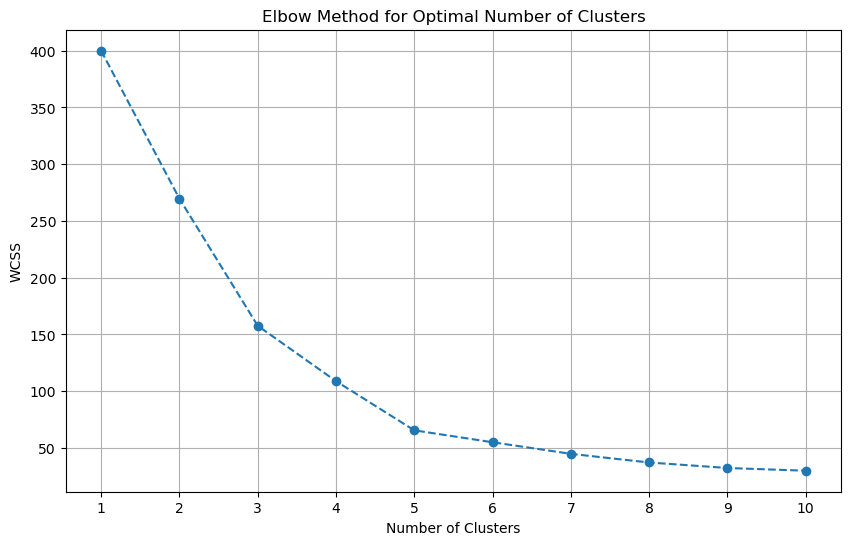

In [40]:
# Plotting the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [31]:
# Applying K-means clustering with the optimal number of clusters (e.g., K=5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Assigning cluster labels back to the original data
data['Cluster'] = clusters

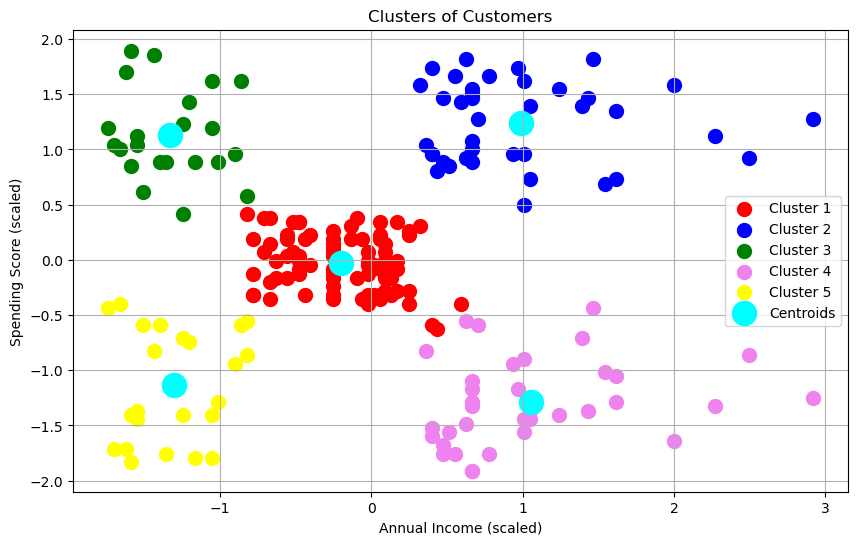

In [36]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'violet', 'yellow']
for i in range(optimal_clusters):
    plt.scatter(features_scaled[clusters == i, 0], features_scaled[clusters == i, 1], s=100, c=colors[i], label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='cyan', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Displaying some sample data points from each cluster
print("\nClusters with sample data points:")
print('***********************************************************')
for cluster_id in range(optimal_clusters):
    print(f"Cluster {cluster_id + 1}:")
    print(data[data['Cluster'] == cluster_id].head(), "\n")

# Group the data by clusters and calculating summary statistics for each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'std'],  # Mean and standard deviation of Age
    'Annual Income (k$)': ['mean', 'std'],  # Mean and standard deviation of Annual Income
    'Spending Score (1-100)': ['mean', 'std'],  # Mean and standard deviation of Spending Score
    'CustomerID': 'count'  # Number of customers in each cluster
})


Clusters with sample data points:
***********************************************************
Cluster 1:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
43          44  Female   31                  39                      61   
46          47  Female   50                  40                      55   
47          48  Female   27                  40                      47   
48          49  Female   29                  40                      42   
49          50  Female   31                  40                      42   

    Cluster  
43        0  
46        0  
47        0  
48        0  
49        0   

Cluster 2:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
123         124    Male   39                  69                      91   
125         126  Female   31                  70                      77   
127         128    Male   40                  71                      95   
129         130    Male   38              

In [37]:
# Displaying the summary statistics of the clusters
print("\nOverall summary of the grouped clusters:")
print('********************************************')
print(cluster_summary)


Overall summary of the grouped clusters:
********************************************
               Age            Annual Income (k$)             \
              mean        std               mean        std   
Cluster                                                       
0        42.716049  16.447822          55.296296   8.988109   
1        32.692308   3.728650          86.538462  16.312485   
2        25.272727   5.257030          25.727273   7.566731   
3        41.114286  11.341676          88.200000  16.399067   
4        45.217391  13.228607          26.304348   7.893811   

        Spending Score (1-100)            CustomerID  
                          mean        std      count  
Cluster                                               
0                    49.518519   6.530909         81  
1                    82.128205   9.364489         39  
2                    79.363636  10.504174         22  
3                    17.114286   9.952154         35  
4                    20

In [33]:
# Saving the DataFrame with cluster information to a new CSV file
data.to_csv('Mall_Customers_Clustered.csv', index=False)
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
